In [20]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

 # **Level 1 Taks 1**
## **Task: Top Cuisines**

In [21]:
df= pd.read_csv("Dataset .csv")

In [22]:
df.head() ## Data Overview

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [23]:
df.shape  # we have 9551 rows and 21 columns in our dataset

(9551, 21)

In [24]:
df.isnull().sum()  ## Checking null values 

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [25]:
df.info() ## Quick information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [26]:
df.describe() ## Statistical summary of Dataset

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [27]:
df.duplicated().sum() # Checking duplicate data

0

## Determine the top three most common cuisines in the dataset

In [28]:
top_cuisine = []

def to_cuisines(cuisines):
    if isinstance(cuisines, str): 
        cuisines_list = cuisines.split(', ') 
        for cuisine in cuisines_list:
            top_cuisine.append(cuisine)

df['Cuisines'].apply(to_cuisines)

0       None
1       None
2       None
3       None
4       None
        ... 
9546    None
9547    None
9548    None
9549    None
9550    None
Name: Cuisines, Length: 9551, dtype: object

In [29]:
top_cuisine = pd.DataFrame(top_cuisine, columns=['Cusine']).value_counts().sort_values(ascending=False).reset_index()

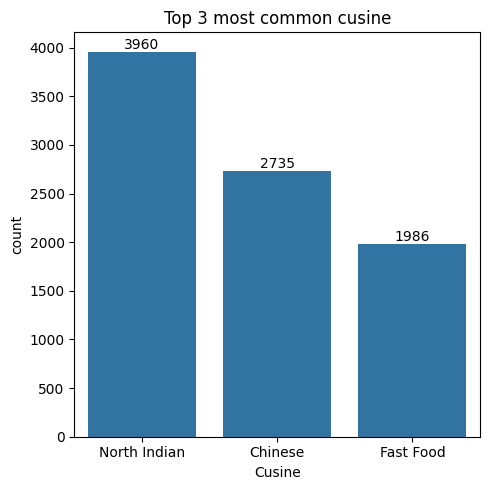

In [30]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x=top_cuisine['Cusine'].head(3), y=top_cuisine['count'].head(3))
ax.bar_label(ax.containers[0])
plt.title("Top 3 most common cusine")
plt.tight_layout()
plt.show()

In [31]:
top_3 = df['Cuisines'].value_counts().sort_values(ascending=False).head(3).reset_index()
top_3

,Cuisines,count
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354


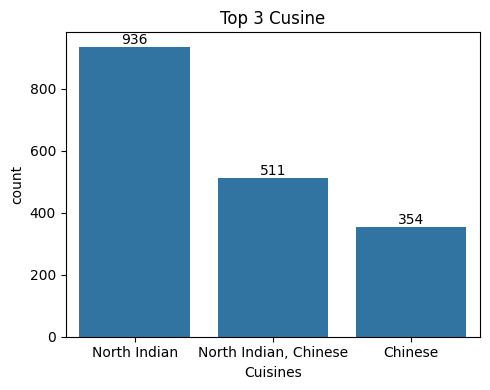

In [32]:
plt.figure(figsize=(5,4))
ax= sns.barplot(x= top_3['Cuisines'], y=top_3['count'])
ax.bar_label(ax.containers[0])
plt.title("Top 3 Cusine")
plt.tight_layout()
plt.show()

## Calculate the percentage of restaurants that serve each of the top cuisines.



In [52]:
cuisine_counts = df['Cuisines'].value_counts()

In [53]:
percentage_cusine = cuisine_counts/cuisine_counts.sum()*100

In [54]:
percentage_cusine= percentage_cusine.reset_index()
percentage_cusine

,Cuisines,count
0,North Indian,9.809264
1,"North Indian, Chinese",5.355271
2,Chinese,3.709914
3,Fast Food,3.709914
4,"North Indian, Mughlai",3.500314
...,...,...
1820,"Bengali, Fast Food",0.010480
1821,"North Indian, Rajasthani, Asian",0.010480
1822,"Chinese, Thai, Malaysian, Indonesian",0.010480
1823,"Bakery, Desserts, North Indian, Bengali, South...",0.010480


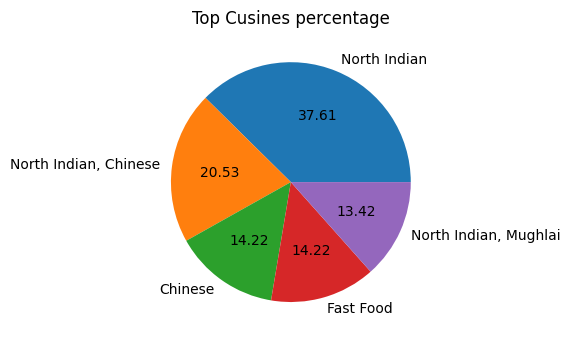

In [57]:
plt.figure(figsize=(5,4))
plt.pie(percentage_cusine['count'].head(5), labels=percentage_cusine["Cuisines"].head(5), autopct="%.2f")
plt.title("Top Cusines percentage")
plt.tight_layout()
plt.show()

# **Level 1 Task 2**
# **Task: City Analysis**


## Identify the city with the highest number of restaurants in the dataset.



In [58]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [59]:
highest_city = df.groupby("City")['Restaurant ID'].count().sort_values(ascending=False).head(5).reset_index()

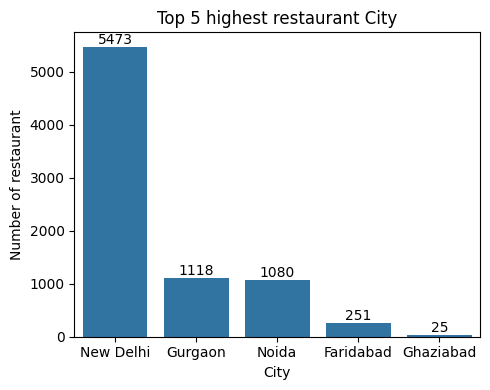

In [60]:
plt.figure(figsize=(5,4))
ax = sns.barplot(x=highest_city['City'], y=highest_city['Restaurant ID'])
ax.bar_label(ax.containers[0])
plt.title("Top 5 highest restaurant City")
plt.ylabel("Number of restaurant")
plt.tight_layout()
plt.show()


## Calculate the average rating for restaurants in each city.



In [61]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [62]:
avg_rating= df.groupby("City")['Aggregate rating'].mean().sort_values(ascending=False).reset_index()
avg_rating

,City,Aggregate rating
0,Inner City,4.900000
1,Quezon City,4.800000
2,Makati City,4.650000
3,Pasig City,4.633333
4,Mandaluyong City,4.625000
...,...,...
136,New Delhi,2.438845
137,Montville,2.400000
138,Mc Millan,2.400000
139,Noida,2.036204


<Axes: ylabel='Aggregate rating'>

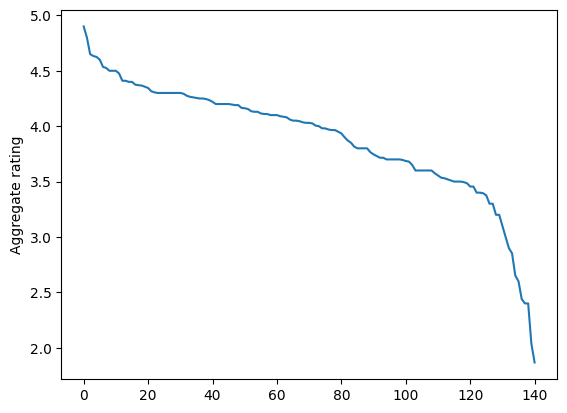

In [63]:
sns.lineplot(avg_rating['Aggregate rating'])

## Determine the city with the highest average rating


In [64]:
avg_rating[['City','Aggregate rating']].head(1)

,City,Aggregate rating
0,Inner City,4.9


<Axes: xlabel='City', ylabel='Aggregate rating'>

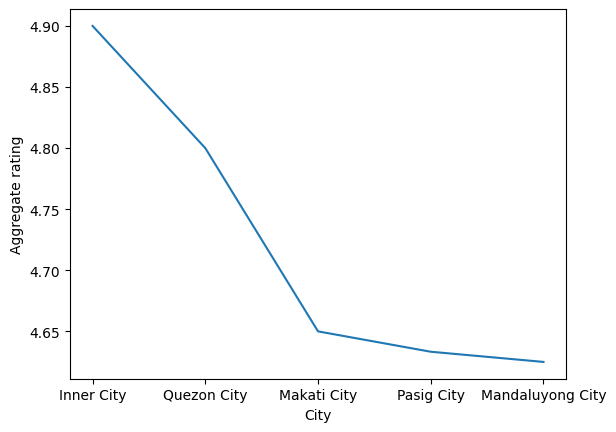

In [65]:
sns.lineplot(y=avg_rating['Aggregate rating'].head(5), x=avg_rating['City'].head(5))

# **Level 1 Task 3**
## Task: Price Range Distribution


## Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants



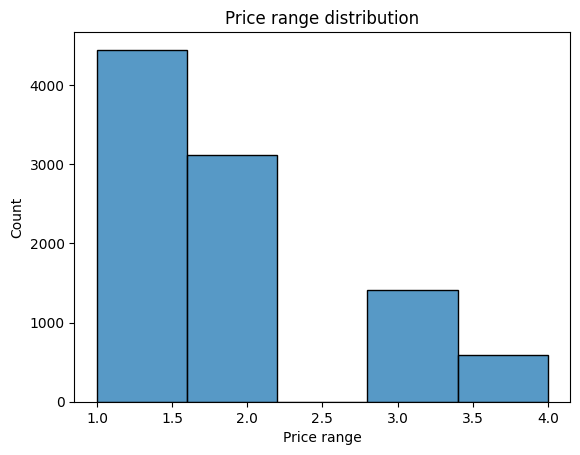

In [66]:
sns.histplot(df['Price range'], bins=5)
plt.title("Price range distribution")
plt.show()

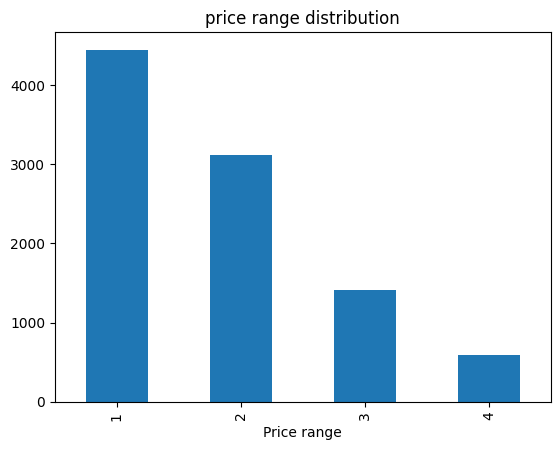

In [67]:
df['Price range'].value_counts().plot(kind='bar')
plt.title("price range distribution")
plt.show()

## Calculate the percentage of restaurants in each price range category.


In [68]:
price_range_counts = df['Price range'].value_counts()
price_range_percentage = (price_range_counts / price_range_counts.sum()) * 100
price_range_percentage

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64

# **Level 1  Task 4**
## Task: Online Delivery

## Determine the percentage of restaurants that offer online delivery.


In [84]:
df[df['Has Online delivery']=="Yes"]['Restaurant ID'].count()/df['Has Online delivery'].value_counts().sum()*100

25.662234321013504

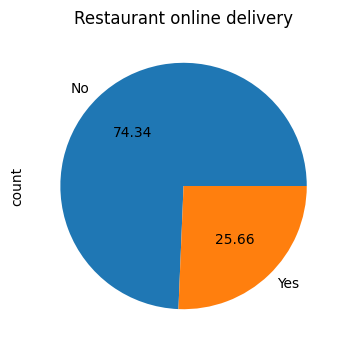

In [91]:
plt.figure(figsize=(5,4))
df['Has Online delivery'].value_counts().plot.pie(autopct="%.2f", title= "Restaurant online delivery")
plt.show()

## Compare the average ratings of restaurants with and without online delivery.


##  average ratings of restaurants with online delivery

In [116]:
with_online = df[df['Has Online delivery']=="Yes"]['Aggregate rating'].mean()
with_online= pd.Series(with_online)

##  average ratings of restaurants without online delivery

In [115]:
without_online = df[df['Has Online delivery']=="No"]['Aggregate rating'].mean()
without_online= pd.Series(without_online)

## Compararing

In [138]:
compare = pd.DataFrame({'With': with_online, "Without": without_online})
compare

,With,Without
0,3.248837,2.465296


Text(0.5, 1.0, 'Comparing Online delivery')

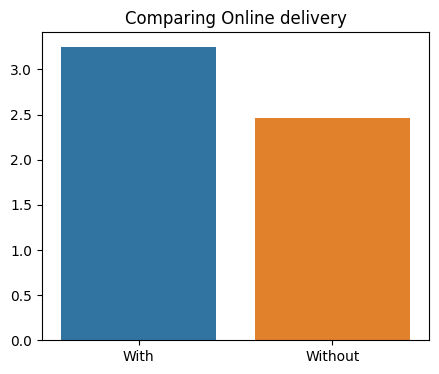

In [141]:
plt.figure(figsize=(5,4))
sns.barplot(compare)
plt.title("Comparing Online delivery")